# 第四章 多层感知机

## 4.1 多层感知机

### 4.1.1 隐藏层
#### 线性模型可能会出错
* 线性意味着单调假设，但是**单调不意味着线性**。例如评估申请人偿还贷款可能性时，收入从0增加到5万，可能比从100万增加到105万带来更大的还款可能性
* **违反单调性**的例子
  * 根据体温预测死亡率。体温高于37摄氏度时，温度越高风险越大。但是低于37摄氏度时，温度越高风险越小。可以使用与37摄氏度的距离作为特征
  * 对猫狗图像进行分类，增加（13,17）处的像素强度是否会增加/降低图像描绘狗的似然？任何像素的重要性都以复杂的方式取决于该像素的上下文（周围像素的值）

#### 在网络中加入隐藏层
* 通过在网络中加入一个或多个隐藏层来克服线性模型的限制，使其能处理更普遍的函数关系模型
* **多层感知机（multilayer perceptron, MLP）**
  * 将许多全连接层堆叠在一起
  * 每一层都输出到上面的层，直到生成最后的输出
  * 可以把前L-1层看作表示，把最后一层看作**线性预测器**
  * 一个单隐藏层的多层感知机，具有5个**隐藏单元**
    
  ![4.1.1](./images/4.1.1.png)

#### 从线性到非线性
* 线性表示
  * $\textbf{X}\in\mathbb{R}^{n \times d}$表示$n$个样本的小批量，其中每个样本具有$d$个输入特征
  * 对于具有$h$个隐藏单元的单隐藏层多层感知机，用$\textbf{H}\in\mathbb{R}^{n \times h}$表示隐藏层的输出，称为隐藏表示（hidden representation）。在数学或代码中，$\textbf{H}$也被称为隐藏层变量（hidden-layer variable）或隐藏变量（hidden variable）
  * 隐藏层和输出层都是全连接的，所以有隐藏层权重$\textbf{W}^{(1)}\in\mathbb{R}^{d \times h}$和隐藏层偏置$\textbf{b}^{(1)}\in\mathbb{R}^{1 \times h}$以及输出层权重$\textbf{W}^{(2)}\in\mathbb{R}^{h \times q}$和输出层偏置$\textbf{b}^{(2)}\in\mathbb{R}^{1 \times q}$
  * 计算单隐藏层多层感知机的输出$\textbf{O}\in\mathbb{R}^{n \times q}$：
    $$\textbf{H}=\textbf{XW}^{(1)}+\textbf{b}^{(1)},$$
    $$\textbf{O}=\textbf{HW}^{(2)}+\textbf{b}^{(2)}.$$
  * 添加隐藏层后，没有任何好处，因为上述2式可以合并成：
    $$\textbf{O}=\textbf{XW}+\textbf{b}.$$
* 非线性表示
  * 发挥多层架构潜力的关键因素：在仿射变换后对每个隐藏单元应用**非线性**的 **激活函数（activation function）** $\sigma$，激活函数的输出（例如$\sigma(.)$）被称为**活性值（activations）**
  * 一般来说，有了激活函数，多层感知机就不可能退化成线性模型：
    $$\textbf{H}=\sigma(\textbf{XW}^{(1)}+\textbf{b}^{(1)}),$$
    $$\textbf{O}=\textbf{HW}^{(2)}+\textbf{b}^{(2)}.$$
  * 为了构建更通用的感知机，可以继续堆叠隐藏层，例如$\textbf{H}^{(1)}=\sigma_1(\textbf{XW}^{(1)}+\textbf{b}^{(1)})$ 和$\textbf{H}^{(2)}=\sigma_2(\textbf{H}^{(1)}\textbf{W}^{(2)}+\textbf{b}^{(2)})$，一层叠一层，从而产生更有**表达能力**的模型

#### 通用近似定理
* 单隐藏层网络能学习任何函数（给定足够的神经元和正确的权重）
* 但并不意味着应该尝试使用单隐藏层网络来解决所有问题
* 通过使用**更深（而不是更广）的网络**，可以更容易地逼近许多函数

### 4.1.2 激活函数
* 激活函数（activation function）**通过计算加权和并加上偏置来确定神经元是否应该被激活**，它们将输入信号转换为输出的可微运算。大多数激活函数都是非线性的
* 常见激活函数
  * ReLU函数
  * sigmoid函数
  * tanh函数

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

#### ReLU函数
* 修正线性单元（Rectified linear unit, ReLU）
  $$\text{ReLU}(x)=\text{max}(x,0)$$
* 最受欢迎，因为实现简单，同时在各种预测任务中表现良好
* 优点
  * **求导表现**特别好：要么让参数消失，要么让参数通过
  * 减轻了困扰以往神经网络的**梯度消失**问题

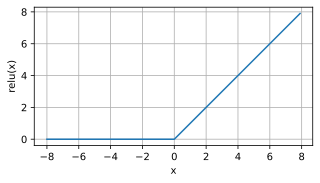

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), xlabel='x', ylabel='relu(x)', figsize=(5, 2.5))

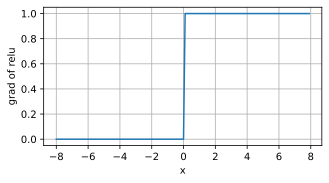

In [3]:
# 输入精确等于0时不可导，也认为导数为0
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

ReLU的变体，包括**参数化ReLU（Parameterized ReLU, pReLU）** 函数。添加一个线性项，即使参数为负时某些信息仍然可以通过
$$\text{pRelu}(x)=\text{max}(0,x)+\alpha \text{min}(0,x)$$

#### sigmoid函数
* 将定义域在$\mathbb{R}$中的输入变换为区间(0,1)上的输出。因此通常称为**挤压函数（squashing function）**：将范围(-inf,inf)中的任意输入压缩到区间(0,1)中的某个值：
  $$\text{sigmoid}(x)=\frac{1}{1+\text{exp}(-x)}$$
* 特点
  * 平滑、可微的阈值单元近似
  * 将输出视作**二元分类**问题的概率时，sigmoid被广泛用作输出单元上的激活函数（可以视为softmax的特例）
  * 在隐藏层中较少使用，大部分时候被更简单、更容易训练的ReLU取代

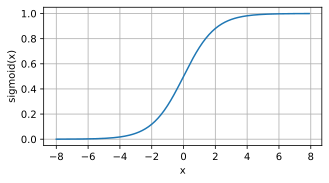

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

导数
$$\frac{d}{dx}\text{sigmoid}(x)=\frac{\text{exp}(-x)}{(1+\text{exp}(-x))^2}=\text{sigmoid}(x)(1-\text{sigmoid}(x))$$

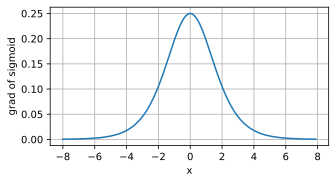

In [5]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

#### tanh函数
* 双曲正切，类sigmoid，将输入压缩转换到区间(-1,1)上
  $$\text{tanh}(x)=\frac{1-\text{exp}(-2x)}{1+\text{exp}(-2x)}$$

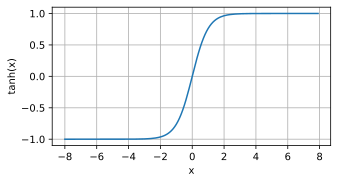

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

导数
$$\frac{d}{dx}\text{tanh}(x)=1-\text{tanh}^2(x)$$

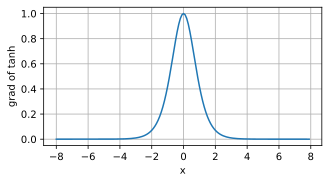

In [7]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## 4.2 多层感知机的从零开始实现

In [8]:
import torch
from torch import nn
from d2l import torch as d2l

In [9]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 4.2.1 初始化模型参数
* 超参数隐藏单元个数， 选择2的若干次幂，在计算上更高效

In [10]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256 # 256个隐藏单元

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

### 4.2.2 激活函数

In [11]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

### 4.2.3 模型

In [12]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1) # "@"代表矩阵乘法
    return (H@W2 + b2)

### 4.2.4 损失函数

In [13]:
loss = nn.CrossEntropyLoss(reduction='none')

### 4.2.5 训练

In [14]:
# Copied from ch03

from IPython import display

def accuracy(y_hat, y): #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y # [False, True]
    return float(cmp.type(y.dtype).sum()) # [False, True] -> [0, 1]再求和

def evaluate_accuracy(net, data_iter): #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval() # 将模型设置为评估模式
    metric = Accumulator(2) # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

class Accumulator: #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

def train_epoch_ch3(net, train_iter, loss, updater): #@save
    """训练模型一个迭代周期"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()

    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

class Animator: #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-', 'r:'), nrows=1, ncols=1, figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater): #@save
    """训练模型"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9], legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

def predict_ch3(net, test_iter, n=6): #@save
    """预测标签"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

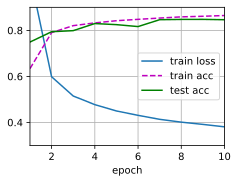

In [15]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

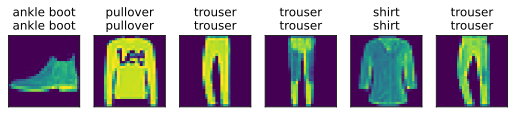

In [16]:
# 预测
predict_ch3(net, test_iter)

![fashion-mnist-4.2.5.png](./images/fashion-mnist-4.2.5.png)

## 4.3 多层感知机的简洁实现

In [17]:
import torch
from torch import nn
from d2l import torch as d2l

### 4.3.1 模型

In [18]:
net = nn.Sequential(nn.Flatten(), # 展平层
                    nn.Linear(784, 256), # 隐藏层
                    nn.ReLU(), # 隐藏层激活函数
                   nn.Linear(256, 10)) # 输出层

# 初始化模型参数
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.1)

net.apply(init_weights);

In [19]:
# 损失函数 & 优化算法
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

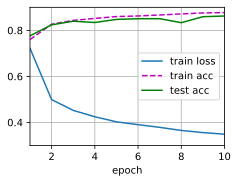

In [20]:
# 训练
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 4.4 模型选择、欠拟合和过拟合
* 机器学习的根本问题：如何**发现可以泛化的模式**
* 过拟合（overfitting）：将模型在训练数据上拟合的比在潜在分布中更接近的现象

### 4.4.1 训练误差和泛化误差
* 训练误差（training error）：模型在训练数据集上计算得到的误差
* 泛化误差（generalization error）：模型应用在同样从原始样本的分布中抽取的无限多数据样本时，模型误差的**期望**

#### 统计学习理论
* 独立同分布假设（i.i.d assumption）：假设训练数据和测试数据都是从相同的分布中独立提取的

#### 模型复杂性
* 模型，数据和误差
  * 简单模型+大量数据->泛化误差与训练误差相近
  * 更复杂的模型+更少的数据->训练误差会下降，泛化误差会增大
* 几个倾向于影响模型泛化的因素
  * 可调整参数的数量
    * 当可调整参数的数量（有时称为自由度）很大时，模型往往更容易过拟合
  * 参数采用的值
    * 当权重的取值范围较大时，模型可能更容易过拟合
  * 训练样本的数量
    * 训练样本数量越大，过拟合需要的模型就越复杂

### 4.4.2 模型选择
* 定义
  * 在评估几个候选模型后选择最终的模型
* 场景
  * 有时需要进行比较的模型本质上完全不同，例如决策树和线性模型
  * 有时需要比较不同的超参数设置下的同一类模型
    
#### 验证集
* 为什么需要验证集
  * 原则上，在确定所有的超参数之前，不希望用到测试集。否则可能会有过拟合测试数据的风险，无法再使用测试数据评估模型
  * 也不能仅仅依靠训练数据来选择模型，这样无法评估训练数据的泛化误差
* 三份数据
  * 训练数据集
  * 验证数据集
  * 测试数据集
* 现实是验证数据和测试数据之间的边界模糊。本书中使用数据集应该被正确地称为训练数据和验证数据的数据集，并没有真正的测试数据集

#### K折交叉验证
* 问题
  * 当训练数据稀缺时，甚至可能无法提供足够的数据来构成一个合适的验证集
* 流行解法
  * K折交叉验证。将原始数据分成K个不重合子集。执行K次模型训练和验证，每次在K-1个子集上进行训练，并在剩余的一个子集上进行验证。最后通过对K次实验的结果取平均来估计训练和验证误差

### 4.4.3 欠拟合还是过拟合
* 训练误差和验证误差都很严重，但它们之间仅有一点差距。如果模型不能降低训练误差，这可能意味着模型过于简单（即表达能力不足），无法捕获试图学习的模式，即**欠拟合（underfitting）**。由于训练误差和验证误差之间的泛化误差很小，有理由相信可以用一个更复杂的模型降低训练误差
* 训练误差明显低于验证误差表明严重的**过拟合（overfitting）**

#### 模型复杂性

![4.4.1](./images/4.4.1.png)

#### 数据集大小
* 训练数据集中的样本越少，越有可能过拟合
* 一般来说，更多的数据不会有什么坏处
* 对于固定的任务和数据分布，模型复杂性和数据集大小之间通常存在关系
  * 给出更多的数据，可能拟合一个更复杂的模型
  * 如果没有足够的数据，简单的模型可能更有用

### 4.4.4 多项式回归

In [21]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

#### 生成数据集
给定$x$，使用以下三阶多项式来生成训练和测试数据的标签：
$$y=5+1.2x-3.4\frac{x^2}{2!}+5.6\frac{x^3}{3!}+\epsilon$$
其中$\epsilon \in \mathcal{N}(0,0.1^2)$，使用$\frac{x^i}{i!}$的目的是避免非常大的梯度值或损失值

In [22]:
max_degree = 20 # 多项式的最大阶数
n_train, n_test = 100, 100 # 训练和测试数据集大小
true_w = np.zeros(max_degree) # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1) # gamma(n)=(n-1)!
# labels的维度：(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [23]:
# Numpy ndarray转换为tensor
import warnings
warnings.filterwarnings('ignore')
true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]

In [24]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[0.8769],
         [0.1450]]),
 tensor([[1.0000e+00, 8.7687e-01, 3.8445e-01, 1.1237e-01, 2.4634e-02, 4.3202e-03,
          6.3138e-04, 7.9091e-05, 8.6691e-06, 8.4464e-07, 7.4064e-08, 5.9041e-09,
          4.3143e-10, 2.9100e-11, 1.8227e-12, 1.0655e-13, 5.8394e-15, 3.0120e-16,
          1.4673e-17, 6.7718e-19],
         [1.0000e+00, 1.4496e-01, 1.0506e-02, 5.0766e-04, 1.8397e-05, 5.3337e-07,
          1.2886e-08, 2.6684e-10, 4.8351e-12, 7.7877e-14, 1.1289e-15, 1.4876e-17,
          1.7970e-19, 2.0038e-21, 2.0748e-23, 2.0050e-25, 1.8165e-27, 1.5489e-29,
          1.2474e-31, 9.5168e-34]]),
 tensor([5.2833, 5.1893]))

#### 对模型进行训练和测试

In [25]:
def evaluate_loss(net, data_iter, loss): #@save
    """评估给定数据集上模型的损失"""
    metric = Accumulator(2) # 损失的总和，样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [26]:
# 训练函数
def train(train_features, test_features, train_labels, test_labels, num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为已经在多项式中实现
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)), batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)), batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log', xlim=[1, num_epochs], ylim=[1e-3, 1e2], legend=['train', 'test'])
    for epoch in range(num_epochs):
        train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

#### 三阶多项式函数拟合（正常）

weight: [[ 5.0080566  1.1984876 -3.3904746  5.6224327]]


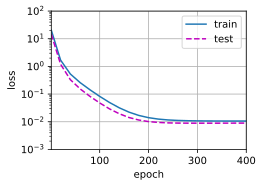

In [27]:
# 从多项式特征中选择前4个维度，即1, x, x^2/2!, x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4], labels[:n_train], labels[n_train:])

#### 线性函数拟合（欠拟合）

weight: [[2.9356942 3.7460237]]


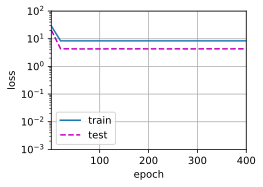

In [28]:
# 从多项式特征中选择前2个维度，即1, x
train(poly_features[:n_train, :2], poly_features[n_train:, :2], labels[:n_train], labels[n_train:])

#### 高阶多项式函数拟合（过拟合）

weight: [[ 5.0002337   1.2765529  -3.3712082   5.153605   -0.03236375  1.5043198
   0.11284874  0.38256904  0.13847725 -0.13856177  0.12599649  0.11477353
  -0.11197964 -0.14189743 -0.06994829  0.08369052  0.04703065  0.16430324
  -0.02692524  0.16884506]]


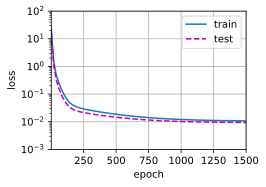

In [29]:
# 从多项式特征中选择所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:], num_epochs=1500)

## 4.5 权重衰减
* **正则化**模型的技术，缓解过拟合问题
* 可以通过收集更多的训练数据来缓解过拟合，但这样成本很高，耗时颇多，或者完全超出我们的控制，因而在短期内不可能做到。假设已经有了尽可能多的高质量数据，便可以将重点放在正则化技术上
* 上节通过调整拟合多项式的阶数来限制模型的容量，**限制特征的数量**是缓解过拟合的一种常用技术，但是太简单，在多变量的情况下阶数上微小的变化也会显著增加模型的复杂性

#### 范数与权重衰减
* **权重衰减（weight decay）** 是最广泛使用的正则化技术之一，通常被称为$L_2$正则化
* **通过函数与零的距离来衡量函数的复杂度**
* 如何衡量？一种简单的方法是**通过线性函数$f(\textbf{x})=\textbf{w}^{\text{T}}\textbf{x}$中权重向量的某个范数来度量其复杂性**，例如$||\textbf{w}||^2$
* 要保证权重向量比较小，最常用的方法是将其范数作为**惩罚**加到最小化损失的问题中，将原来的训练目标最小化训练标签上的预测损失，调整为最小化预测损失和惩罚之和
* 此时，如果权重向量增长的太大，学习算法可能会更集中于最小化权重范数$||\textbf{w}||^2$
* 线性回归损失：$L(\textbf{w},b) = \frac{1}{n}\sum\limits_{i=1}^{n}\frac{1}{2}({\textbf{w}}^\text{T}{\textbf{x}}^{(i)}+b-y^{(i)})^2$
* 加入额外惩罚的损失：$L(\textbf{w},b)+\frac{\lambda}{2}||\textbf{w}||^2$
  * 对于$\lambda=0$，恢复了原来的损失
  * 对于$\lambda>0$，限制$||\textbf{w}||^2$大小，越大则对$\textbf{w}$的约束越大
* 为什么使用平方范数而不是标准范数（欧几里得距离）？
  * 为了便于计算
* 为什么不使用$L_1$范数？
  * 使用$L_2$范数的一个原因是它对权重向量的大分量施加了巨大的惩罚，使得学习算法偏向于在大量特征上均匀分布权重的模型，实践中可能使得它们对单个变量中的观测误差更为稳定
  * 相比之下，$L_1$惩罚会导致模型将权重集中在一小部分特征上，而将其他权重清除为零。这称为**特征选择（feature selection）**，这可能是其他场景下需要的
* $L_2$正则化线性模型构成经典的**岭回归（ridge regression）** 算法；$L_1$正则化线性回归是统计学中类似的基本模型，通常被称为**套索回归（lasso regression）**
* $L_2$正则化回归的小批量随机梯度下降更新：
  $$\textbf{w}\leftarrow(1-\eta\lambda)\textbf{w}-\frac{\eta}{|B|}\sum\limits_{i\in{B}}{\textbf{x}}^{(i)}({\textbf{w}}^\text{T}{\textbf{x}}^{(i)}+b-y^{(i)})$$
  * 根据估计值与观测值之间的差异更新$\textbf{w}$的同时，也试图将$\textbf{w}$的大小缩小到零。所以这种方法有时也被称为**权重衰减**
* 是否对相应的偏置$b^2$进行惩罚在不同的实践中会有所不同，在神经网络的不同层中也会有所不同。通常，网络输出层的偏置项不会被正则化

### 4.5.1 高维线性回归
* 通过一个例子演示权重衰减

In [30]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

通过以下公式生成数据：
$$y=0.05+\sum_{i=1}^d0.01x_i+\epsilon$$
其中$\epsilon\in\mathcal{N}(0,0.01^2)$

In [31]:
# 为了使拟合的效果更加明显，将维数增加到d=200，并使用一个只包含20个样本的小训练集
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

### 4.5.2 从零开始实现

#### 初始化模型参数

In [32]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

#### 定义$L_2$范数惩罚

In [33]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

#### 定义训练代码实现

In [34]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

#### 忽略正则化直接训练
* 严重的过拟合

w的L2范数是： 14.8304443359375


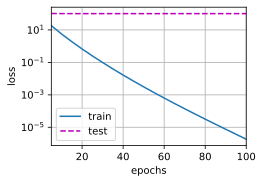

In [35]:
train(lambd=0)

#### 使用权重衰减
* 过拟合缓解

w的L2范数是： 0.35166990756988525


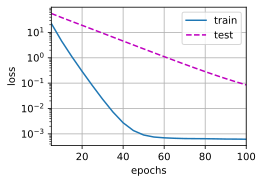

In [36]:
train(lambd=3)

### 4.5.3 简洁实现

In [37]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params": net[0].weight, 'weight_decay': wd},
        {"params": net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', xlim=[5, num_epochs], legend=['train', 'loss'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 13.270197868347168


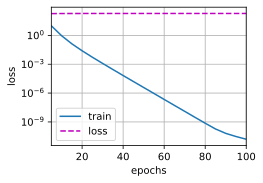

In [38]:
train_concise(0)

w的L2范数： 0.45712512731552124


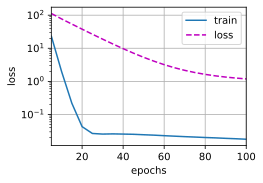

In [39]:
train_concise(3)

## 4.6 暂退法（Dropout）
* 权重衰减的合理性
  * 我们希望模型深度挖掘特征，即将权重分散到许多特征中，而不是过于依赖少数潜在的虚假关联

### 4.6.1 重新审视过拟合
* 线性模型
  * 当面对更多的特征而样本不足时，线性模型往往会过拟合
  * 当给出更多的样本而不是特征，通常线性模型不会过拟合
* 线性模型泛化的可靠性是有代价的
  * 线性模型没有考虑特征之间的交互作用
* **偏差-方差权衡（bias-variance tradeoff）**
  * 泛化性和灵活性之间的基本权衡
  * 线性模型有很高的偏差：它们只能表示一小类函数。这些模型的方差很低：它们在不同的随机数据样本上可以得到相似的结果
  * 深度神经网络位于偏差-方差谱的另一端。神经网络并不局限于单独查看每个特征，而是学习特征之间的交互
* 即使有比特征多得多的样本，深度神经网络也有可能过拟合
* 深度神经网络的泛化性质令人费解，而这种泛化性质的数学基础仍然是悬而未决的研究问题